<a href="https://colab.research.google.com/github/VictorOPreuss/aceleradev_ds/blob/master/desafios/desafio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
uploaded = files.upload()

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ = pd.read_csv('test.csv')

In [0]:
cols = list(test.columns)
cols.append('NU_NOTA_MT')
train = train[cols]
train = train.select_dtypes(exclude=['object'])
test = test.select_dtypes(exclude=['object'])

In [5]:
train.sample(10)

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
1881,23,18,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,493.3,569.5,571.0,1,1.0,100.0,120.0,120.0,120.0,120.0,580.0,483.8
11781,41,18,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,436.8,502.6,453.1,1,1.0,120.0,120.0,120.0,120.0,40.0,520.0,587.1
13311,31,18,3,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,528.3,616.0,601.2,0,1.0,160.0,180.0,180.0,180.0,200.0,900.0,585.5
5935,23,16,3,1,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8716,52,18,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,504.3,571.6,539.2,1,1.0,160.0,160.0,120.0,140.0,120.0,700.0,526.9
9909,35,54,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,394.7,525.7,564.1,0,1.0,120.0,120.0,120.0,100.0,80.0,540.0,510.6
1033,41,16,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,385.5,487.4,449.0,1,1.0,120.0,120.0,120.0,120.0,60.0,540.0,464.4
374,31,22,2,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,415.9,465.6,391.6,1,1.0,80.0,80.0,100.0,80.0,80.0,420.0,478.6
12651,26,17,2,1,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2036,41,23,3,1,1,6,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,456.9,468.1,568.1,1,1.0,120.0,120.0,80.0,100.0,40.0,460.0,471.5


In [6]:
test.sample(10)

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
2331,35,20,2,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,663.8,711.7,681.7,0,1.0,160.0,180.0,160.0,160.0,160.0,820.0
1754,52,19,3,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,501.4,504.4,381.9,0,1.0,140.0,120.0,100.0,120.0,40.0,520.0
4249,29,19,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3818,43,17,0,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,468.9,453.0,498.5,1,1.0,120.0,120.0,120.0,120.0,60.0,540.0
2582,35,18,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,389.9,541.9,463.8,0,1.0,120.0,100.0,80.0,80.0,40.0,420.0
3909,35,21,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,474.1,585.7,621.0,0,1.0,100.0,100.0,80.0,100.0,100.0,480.0
332,26,22,3,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,22,17,2,1,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,408.5,366.3,402.8,1,1.0,120.0,100.0,80.0,80.0,40.0,420.0
2955,31,29,2,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,23,20,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   NU_IDADE                13730 non-null  int64  
 2   TP_COR_RACA             13730 non-null  int64  
 3   TP_NACIONALIDADE        13730 non-null  int64  
 4   TP_ST_CONCLUSAO         13730 non-null  int64  
 5   TP_ANO_CONCLUIU         13730 non-null  int64  
 6   TP_ESCOLA               13730 non-null  int64  
 7   TP_ENSINO               4282 non-null   float64
 8   IN_TREINEIRO            13730 non-null  int64  
 9   TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 10  IN_BAIXA_VISAO          13730 non-null  int64  
 11  IN_CEGUEIRA             13730 non-null  int64  
 12  IN_SURDEZ               13730 non-null  int64  
 13  IN_DISLEXIA             13730 non-null  int64  
 14  IN_DISCALCULIA          13730 non-null

In [0]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [9]:
missing_percentage(train)

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,9448,68.81
TP_ENSINO,9448,68.81
NU_NOTA_COMP1,3597,26.20
NU_NOTA_REDACAO,3597,26.20
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_MT,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20


In [10]:
missing_percentage(test)

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,3096,67.66
TP_ENSINO,3096,67.66
TP_STATUS_REDACAO,1199,26.20
NU_NOTA_COMP5,1199,26.20
NU_NOTA_LC,1199,26.20
NU_NOTA_REDACAO,1199,26.20
NU_NOTA_COMP1,1199,26.20
NU_NOTA_COMP2,1199,26.20
NU_NOTA_COMP3,1199,26.20
NU_NOTA_COMP4,1199,26.20


In [0]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [12]:
percent_value_counts(train, 'TP_DEPENDENCIA_ADM_ESC')

,Total,Percent
NaN,9448,68.81
2.0,3611,26.30
4.0,569,4.14
1.0,64,0.47
3.0,38,0.28


In [13]:
percent_value_counts(train, 'TP_STATUS_REDACAO')

,Total,Percent
1.0,9892,72.05
NaN,3597,26.20
4.0,96,0.70
6.0,85,0.62
9.0,20,0.15
3.0,16,0.12
5.0,8,0.06
8.0,8,0.06
7.0,6,0.04
2.0,2,0.01


In [14]:
percent_value_counts(train, 'TP_ENSINO')

,Total,Percent
NaN,9448,68.81
1.0,3886,28.30
3.0,370,2.69
2.0,26,0.19


In [0]:
train['NU_NOTA_MT'].fillna(train['NU_NOTA_MT'].mode(), inplace = True)
train.fillna(0,inplace=True)

test.fillna(0,inplace=True)


In [16]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   NU_IDADE                13730 non-null  int64  
 2   TP_COR_RACA             13730 non-null  int64  
 3   TP_NACIONALIDADE        13730 non-null  int64  
 4   TP_ST_CONCLUSAO         13730 non-null  int64  
 5   TP_ANO_CONCLUIU         13730 non-null  int64  
 6   TP_ESCOLA               13730 non-null  int64  
 7   TP_ENSINO               13730 non-null  float64
 8   IN_TREINEIRO            13730 non-null  int64  
 9   TP_DEPENDENCIA_ADM_ESC  13730 non-null  float64
 10  IN_BAIXA_VISAO          13730 non-null  int64  
 11  IN_CEGUEIRA             13730 non-null  int64  
 12  IN_SURDEZ               13730 non-null  int64  
 13  IN_DISLEXIA             13730 non-null  int64  
 14  IN_DISCALCULIA          13730 non-null

In [17]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["NU_NOTA_MT"], ascending = False, inplace = True)
print(corr.NU_NOTA_MT)

Find most important features relative to target
NU_NOTA_MT                1.000000
NU_NOTA_LC                0.943954
TP_PRESENCA_LC            0.923641
NU_NOTA_CN                0.907039
NU_NOTA_CH                0.903608
NU_NOTA_COMP1             0.882746
NU_NOTA_REDACAO           0.875929
TP_PRESENCA_CH            0.874764
TP_PRESENCA_CN            0.874764
NU_NOTA_COMP4             0.866827
NU_NOTA_COMP2             0.862709
NU_NOTA_COMP3             0.854946
NU_NOTA_COMP5             0.722275
TP_STATUS_REDACAO         0.564273
TP_ESCOLA                 0.189084
TP_DEPENDENCIA_ADM_ESC    0.185663
TP_ENSINO                 0.083482
IN_TREINEIRO              0.078804
TP_ST_CONCLUSAO           0.023736
IN_DISCALCULIA            0.008392
IN_DISLEXIA               0.005259
CO_UF_RESIDENCIA          0.002613
IN_SABATISTA             -0.002457
IN_SURDEZ                -0.002617
IN_BAIXA_VISAO           -0.006546
IN_IDOSO                 -0.009061
IN_GESTANTE              -0.028129
TP_NACI

In [0]:
# drop de features com menos de 70% de correlação com o target

drop_column = ['TP_STATUS_REDACAO', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_ST_CONCLUSAO', 'IN_DISCALCULIA', 'IN_DISLEXIA', 'CO_UF_RESIDENCIA', 'IN_SABATISTA', 'IN_SURDEZ', 
       'IN_BAIXA_VISAO', 'IN_IDOSO', 'IN_GESTANTE', 'TP_NACIONALIDADE', 'TP_COR_RACA', 'TP_LINGUA', 'TP_ANO_CONCLUIU', 'NU_IDADE', 'IN_CEGUEIRA']

train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

In [19]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["NU_NOTA_MT"], ascending = False, inplace = True)
print(corr.NU_NOTA_MT)

Find most important features relative to target
NU_NOTA_MT         1.000000
NU_NOTA_LC         0.943954
TP_PRESENCA_LC     0.923641
NU_NOTA_CN         0.907039
NU_NOTA_CH         0.903608
NU_NOTA_COMP1      0.882746
NU_NOTA_REDACAO    0.875929
TP_PRESENCA_CN     0.874764
TP_PRESENCA_CH     0.874764
NU_NOTA_COMP4      0.866827
NU_NOTA_COMP2      0.862709
NU_NOTA_COMP3      0.854946
NU_NOTA_COMP5      0.722275
Name: NU_NOTA_MT, dtype: float64


In [0]:
# Labels are the values we want to predict
trainmat = np.array(train['NU_NOTA_MT'])
# Remove the labels from the features
# axis 1 refers to the columns
traindata = train.drop('NU_NOTA_MT', axis = 1)
# Convert to numpy array
traindata = np.array(traindata)

In [0]:
scaler = StandardScaler()
traindata_sc = scaler.fit_transform(traindata)
test_sc = scaler.transform(test)

In [0]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(traindata_sc, trainmat, test_size = 0.25, random_state = 42)

In [23]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (10297, 12)
Training Labels Shape: (10297,)
Testing Features Shape: (3433, 12)
Testing Labels Shape: (3433,)


In [24]:
regr = rf(random_state=0, n_estimators=150)
regr.fit(X_train, Y_train)
print(regr.predict(X_test))

[407.21466667   0.         502.62733333 ... 473.30466667   0.
   0.        ]


In [26]:
regr.score(X_test,Y_test)

0.919744620987466

In [0]:
predictions = regr.predict(test_sc)

In [0]:
df = pd.DataFrame(data=predictions.flatten(), columns=['NU_NOTA_MT'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_NOTA_MT  4576 non-null   float64
dtypes: float64(1)
memory usage: 35.9 KB


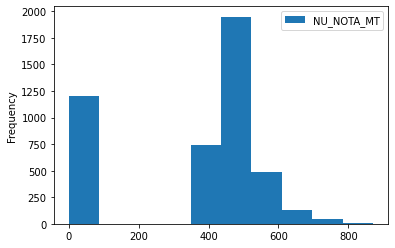

In [29]:
df.plot.hist()

In [0]:
testsupreme = pd.concat([test_.NU_INSCRICAO, df], axis=1)

In [31]:
testsupreme

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,450.684000
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,450.164667
2,b38a03232f43b11c9d0788abaf060f7366053b6d,581.707333
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,476.846000
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,435.734667
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,490.193333
4573,655fa6306720ff16e825903b5422a46608a77545,705.204000
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,478.212667


In [0]:
from google.colab import files
testsupreme.to_csv('answer.csv', index = False)